In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import matplotlib.cbook as cbook 
import statsmodels.formula.api as sm
# link to data source:  http://www.seanlahman.com/baseball-archive/statistics/
#get batting data
dfBatting = pd.DataFrame(pd.read_csv("Batting.csv"))
dfBatting = pd.DataFrame(dfBatting, columns = ['playerID', 'yearID','teamID','G','AB','R','H','2B','3B','HR','SB','CS','BB','SO','HBP','SF'])
#select years 2009 - 2015
dfBatting = dfBatting[(dfBatting['yearID'] >= 2009) & (dfBatting['yearID'] < 2015)]
dfBatting
#dfBatting.loc[dfBatting['playerID'] == 'donaljo02']


,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,SB,CS,BB,SO,HBP,SF
91478,aardsda01,2009,SEA,73,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
91479,abreubo01,2009,LAA,152,563,96,165,29,3,15,30.0,8.0,94,113.0,1.0,9.0
91480,abreuto01,2009,LAN,6,8,0,2,0,0,0,0.0,1.0,3,2.0,0.0,0.0
91481,abreuwi01,2009,TBA,2,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
91482,abreuwi01,2009,CLE,3,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
91483,accarje01,2009,TOR,26,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
91484,aceveal01,2009,NYA,43,2,0,0,0,0,0,0.0,0.0,0,1.0,0.0,0.0
91485,acostma01,2009,ATL,36,1,0,0,0,0,0,0.0,0.0,1,1.0,0.0,0.0
91486,adamsmi03,2009,SDN,37,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
91487,adamsru01,2009,TOR,8,20,2,4,0,0,0,0.0,0.0,1,1.0,0.0,0.0


In [423]:
dfPeople = pd.read_csv("People.csv")
dfPeople = pd.DataFrame(dfPeople, columns = ['playerID','nameFirst','nameLast'])
#dfPeople
tmpPlayer1 = pd.merge(dfBatting, dfPeople, on='playerID', how = 'inner') 
#tmpPlayer1.loc[tmpPlayer1['playerID'] == 'donaljo02']

In [439]:
dfSalaries = pd.read_csv('Salaries.csv')
dfSalaries = pd.DataFrame(dfSalaries, columns=('playerID', 'yearID', 'salary'))
#dfSalaries[dfSalaries['playerID']=='donaljo02']
player = pd.merge(tmpPlayer1, dfSalaries, on = ['playerID', 'yearID'])
player = player.set_index('playerID')
#check for duplicates
player[player.duplicated() == True]
player.loc['donaljo02',:]

,yearID,teamID,G,AB,R,H,2B,3B,HR,SB,CS,BB,SO,HBP,SF,nameFirst,nameLast,salary
playerID,,,,,,,,,,,,,,,,,,
donaljo02,2012,OAK,75,274,34,66,16,0,9,4.0,1.0,14,61.0,5.0,1.0,Josh,Donaldson,480000
donaljo02,2013,OAK,158,579,89,174,37,3,24,5.0,2.0,76,110.0,6.0,6.0,Josh,Donaldson,492500
donaljo02,2014,OAK,158,608,93,155,31,2,29,8.0,0.0,76,130.0,7.0,4.0,Josh,Donaldson,500000


In [441]:
#need to remove pitchers
dfFielding = pd.read_csv('Fielding.csv')
dfFielding = pd.DataFrame(dfFielding, columns = ('playerID', 'POS'))
dfFielding = dfFielding.drop_duplicates(subset="playerID", keep = 'first')
#remove pitchers
dfFielding = dfFielding[dfFielding['POS'] != 'P']
dfFielding
#playerTtl[playerTtl['AB'] >= 300]

dfBatting = pd.merge(player, dfFielding, on = 'playerID', how = 'inner')
dfBatting

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,SB,CS,BB,SO,HBP,SF,nameFirst,nameLast,salary,POS
0,abreubo01,2009,LAA,152,563,96,165,29,3,15,30.0,8.0,94,113.0,1.0,9.0,Bobby,Abreu,5000000,OF
1,abreubo01,2010,LAA,154,573,88,146,41,1,20,24.0,10.0,87,132.0,2.0,5.0,Bobby,Abreu,9000000,OF
2,abreubo01,2011,LAA,142,502,54,127,30,1,8,21.0,5.0,78,113.0,1.0,3.0,Bobby,Abreu,9000000,OF
3,abreubo01,2012,LAA,8,24,1,5,3,0,0,0.0,0.0,2,5.0,0.0,1.0,Bobby,Abreu,9000000,OF
4,abreubo01,2012,LAN,92,195,28,48,8,1,3,6.0,2.0,35,51.0,0.0,0.0,Bobby,Abreu,9000000,OF
5,abreuto01,2010,ARI,81,193,16,45,11,1,1,2.0,1.0,4,47.0,0.0,4.0,Tony,Abreu,407000,2B
6,abreuto01,2013,SFN,53,138,21,37,12,3,2,0.0,2.0,6,33.0,1.0,1.0,Tony,Abreu,498000,2B
7,abreuto01,2014,SFN,3,4,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,Tony,Abreu,745000,2B
8,allenbr01,2012,OAK,3,7,0,0,0,0,0,0.0,0.0,0,5.0,0.0,0.0,Brandon,Allen,482500,1B
9,allenbr01,2012,TBA,7,13,3,2,0,0,1,0.0,0.0,2,4.0,0.0,0.0,Brandon,Allen,482500,1B


In [432]:
dfteams = pd.DataFrame()
dfteams = pd.read_csv("Teams.csv")
dfteams = dfteams[dfteams['yearID'] >= 2013]
#dfteams = dfteams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]
dfteams = dfteams.set_index(['yearID','teamID'])
#dfteams['yearID'].max()
dfteams
#plt.plot(dfteams['salary'][2001],dfteams['W'][2001])

lgID franchID divID  Rank    G  Ghome    W    L DivWin WCWin  \
yearID teamID                                                                
2013   ARI      NL      ARI     W     2  162   81.0   81   81      N     N   
       ATL      NL      ATL     E     1  162   81.0   96   66      Y     N   
       BAL      AL      BAL     E     3  162   81.0   85   77      N     N   
       BOS      AL      BOS     E     1  162   81.0   97   65      Y     N   
       CHA      AL      CHW     C     5  162   81.0   63   99      N     N   
       CHN      NL      CHC     C     5  162   81.0   66   96      N     N   
       CIN      NL      CIN     C     3  162   80.0   90   72      N     Y   
       CLE      AL      CLE     C     2  162   81.0   92   70      N     Y   
       COL      NL      COL     W     5  162   81.0   74   88      N     N   
       DET      AL      DET     C     1  162   81.0   93   69      Y     N   
       HOU      AL      HOU     W     5  162   81.0   51  111      N     N   
       KCA      AL      KCR     C     3  162   81.0   86   76      N     N   
       LAA      AL      ANA     W     3  162   81.0   78   84      N     N   
       LAN      NL      LAD     W     1  162   81.0   92   70      Y     N   
       MIA      NL      FLA     E     5  162   81.0   62  100      N     N   
       MIL      NL      MIL     C     4  162   81.0   74   88      N     N   
       MIN      AL      MIN     C     4  162   81.0   66   96      N     N   
       NYA      AL      NYY     E     4  162   81.0   85   77      N     N   
       NYN      NL      NYM     E     4  162   81.0   74   88      N     N   
       OAK      AL      OAK     W     1  162   81.0   96   66      Y     N   
       PHI      NL      PHI     E     4  162   81.0   73   89      N     N   
       PIT      NL      PIT     C     2  162   81.0   94   68      N     Y   
       SDN      NL      SDP     W     3  162   81.0   76   86      N     N   
       SEA      AL      SEA     W     4  162   81.0   71   91      N     N   
       SFN      NL      SFG     W     4  162   82.0   76   86      N     N   
       SLN      NL      STL     C     1  162   81.0   97   65      Y     N   
       TBA      AL      TBD     E     2  163   81.0   92   71      N     Y   
       TEX      AL      TEX     W     2  163   82.0   91   72      N     N   
       TOR      AL      TOR     E     5  162   81.0   74   88      N     N   
       WAS      NL      WSN     E     2  162   81.0   86   76      N     N   
...            ...      ...   ...   ...  ...    ...  ...  ...    ...   ...   
2018   ARI      NL      ARI     W     3  162   81.0   82   80      N     N   
       ATL      NL      ATL     E     1  162   81.0   90   72      Y     N   
       BAL      AL      BAL     E     5  162   81.0   47  115      N     N   
       BOS      AL      BOS     E     1  162   81.0  108   54      Y     N   
       CHA      AL      CHW     C     4  162   81.0   62  100      N     N   
       CHN      NL      CHC     C     2  163   82.0   95   68      N     Y   
       CIN      NL      CIN     C     5  162   81.0   67   95      N     N   
       CLE      AL      CLE     C     1  162   81.0   91   71      Y     N   
       COL      NL      COL     W     2  163   81.0   91   72      N     Y   
       DET      AL      DET     C     3  162   81.0   64   98      N     N   
       HOU      AL      HOU     W     1  162   81.0  103   59      Y     N   
       KCA      AL      KCR     C     5  162   81.0   58  104      N     N   
       LAA      AL      ANA     W     4  162   81.0   80   82      N     N   
       LAN      NL      LAD     W     1  163   82.0   92   71      Y     N   
       MIA      NL      FLA     E     5  161   81.0   63   98      N     N   
       MIL      NL      MIL     C     1  163   81.0   96   67      Y     N   
       MIN      AL      MIN     C     2  162   81.0   78   84      N     N   
       NYA      AL      NYY     E     2  162   81.0  100   62      N     Y   
       NYN      NL      NYM     E   

In [442]:
dfBatting['BA'] = (dfBatting['H'] / dfBatting['AB'])

dfBatting['OBP'] = (dfBatting['H'] + dfBatting['BB'] + dfBatting['HBP']) / (dfBatting['AB'] + dfBatting['BB'] + dfBatting['HBP'] + dfBatting['SF'])

dfBatting['SLG'] = (dfBatting['H'] + dfBatting['2B'] + (2*dfBatting['3B']) + (3*dfBatting['HR'])) / (dfBatting['AB'])

dfBatting['OPS'] = dfBatting['OBP'] + dfBatting['SLG']

dfBatting

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,...,HBP,SF,nameFirst,nameLast,salary,POS,BA,OBP,SLG,OPS
0,abreubo01,2009,LAA,152,563,96,165,29,3,15,...,1.0,9.0,Bobby,Abreu,5000000,OF,0.293073,0.389805,0.435169,0.824974
1,abreubo01,2010,LAA,154,573,88,146,41,1,20,...,2.0,5.0,Bobby,Abreu,9000000,OF,0.254799,0.352324,0.434555,0.786879
2,abreubo01,2011,LAA,142,502,54,127,30,1,8,...,1.0,3.0,Bobby,Abreu,9000000,OF,0.252988,0.352740,0.364542,0.717282
3,abreubo01,2012,LAA,8,24,1,5,3,0,0,...,0.0,1.0,Bobby,Abreu,9000000,OF,0.208333,0.259259,0.333333,0.592593
4,abreubo01,2012,LAN,92,195,28,48,8,1,3,...,0.0,0.0,Bobby,Abreu,9000000,OF,0.246154,0.360870,0.343590,0.704459
5,abreuto01,2010,ARI,81,193,16,45,11,1,1,...,0.0,4.0,Tony,Abreu,407000,2B,0.233161,0.243781,0.316062,0.559843
6,abreuto01,2013,SFN,53,138,21,37,12,3,2,...,1.0,1.0,Tony,Abreu,498000,2B,0.268116,0.301370,0.442029,0.743399
7,abreuto01,2014,SFN,3,4,0,0,0,0,0,...,0.0,0.0,Tony,Abreu,745000,2B,0.000000,0.000000,0.000000,0.000000
8,allenbr01,2012,OAK,3,7,0,0,0,0,0,...,0.0,0.0,Brandon,Allen,482500,1B,0.000000,0.000000,0.000000,0.000000
9,allenbr01,2012,TBA,7,13,3,2,0,0,1,...,0.0,0.0,Brandon,Allen,482500,1B,0.153846,0.266667,0.384615,0.651282


### Stat Model Element Description
#### R-squared
The coefficient of determination. A statistical measure of how well the regression line approximates the real data points
#### Adj. R-squared
The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals
#### F-statistic
A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals
#### Prob (F-statistic)
The probability that you would get the above statistic, given the null hypothesis that they are unrelated
#### Log-likelihood
The log of the likelihood function.
#### AIC
The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.
#### BIC
The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.
The second table reports for each of the coefficients
### coef
The estimated value of the coefficient
#### std err
The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.
#### t
The t-statistic value. This is a measure of how statistically significant the coefficient is.
#### P > |t|
P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
[95.0% Conf. Interval]
The lower and upper values of the 95% confidence interval
#### Skewness
A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).
#### Kurtosis
A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).
Omnibus
D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.
#### Prob(Omnibus)
The above statistic turned into a probability
Jarque-Bera
A different test of the skewness and kurtosis
#### Prob (JB)
The above statistic turned into a probability
Durbin-Watson
A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis
#### Cond. No
A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).

In [435]:
# run Ordinary Least squares to find best model to run
# First Model
# using this model because it gives the most
runs_reg_model1 = sm.ols("R~OBP+SLG+BA",dfBatting)
runs_reg1 = runs_reg_model1.fit()
runs_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     843.8
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        16:40:36   Log-Likelihood:                -27461.
No. Observations:                6034   AIC:                         5.493e+04
Df Residuals:                    6030   BIC:                         5.496e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3721      0.590     -2.324      0.020      -2.529      -0.215
OBP           66.2645      5.600     11.833      0.000      55.287      77.242
SLG           95.7260      3.537     27.062      0.000      88.792     102.660
BA          -110.7909      7.341    -15.092      0.000    -125.182     -96.400
==============================================================================
Omnibus:                     1043.071   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22504.135
Skew:                           0.131   Prob(JB):                         0.00
Kurtosis:                      12.457   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
#Second Model - best fit
runs_reg_model2 = sm.ols("R~OBP+SLG",dfBatting)
runs_reg2 = runs_reg_model2.fit()
runs_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1110.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        16:40:38   Log-Likelihood:                -27573.
No. Observations:                6034   AIC:                         5.515e+04
Df Residuals:                    6031   BIC:                         5.517e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5069      0.598     -0.847      0.397      -1.680       0.666
OBP            8.6885      4.176      2.081      0.037       0.503      16.874
SLG           67.1978      3.045     22.065      0.000      61.228      73.168
==============================================================================
Omnibus:                      806.585   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6547.820
Skew:                           0.376   Prob(JB):                         0.00
Kurtosis:                       8.048   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
#Third Model
runs_reg_model3 = sm.ols("R~BA",dfBatting)
runs_reg3 = runs_reg_model3.fit()
runs_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     1304.
Date:                Mon, 06 May 2019   Prob (F-statistic):          1.18e-258
Time:                        16:40:39   Log-Likelihood:                -27929.
No. Observations:                6034   AIC:                         5.586e+04
Df Residuals:                    6032   BIC:                         5.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2434      0.582      5.576      0.000       2.103       4.384
BA            91.1188      2.524     36.108      0.000      86.172      96.066
==============================================================================
Omnibus:                      797.927   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1592.361
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       4.900   Cond. No.                         8.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
class playerStats:
    def __init__(self, hits, AB, OBP, SLG, BB, HBP, SF, _2b, _3b, HR, salary, yearID, playerID):
        self.hits = hits
        self.AB = AB
        self.OBP = OBP
        self.SLG = SLG
        self.BB = BB
        self.HBP = HBP
        self.SF = SF
        self._2b = _2b
        self. _3b = _3b
        self.HR = HR
        self.salary = salary
        self.yearID = yearID
        self.playerID = playerID

    def p_value(OBP, SLG):
        return OBP + SLG

#playerStats.p_value(2,2)


In [444]:
#player['AB'].groupby('playerID').sum() 
#pd.playerAGG['AB'] = player['playerID'].groupby('playerID') 
#playerAGG
#playerAGG = playerAGG[(playerAGG['AB'] >= 300)
#playerAGG = playerAGG[(playerAGG['AB'] >= 300)]
pd.playerTtl =dfBatting.groupby(['playerID']).agg(
{
    'AB':sum,
    'OBP':sum,
    'SLG':sum,
    'OPS':sum,
    'salary':sum
}
)

playerTtl = pd.playerTtl
playerTtl = playerTtl[playerTtl['AB'] >= 300]
playerTtl['PV'] = playerTtl['OPS'] / playerTtl['salary']
#playerTtl
#playerTtl['OPS'] = (playerTtl['OBP'] + playerTtl['SLG'])
                
playerAGG = pd.merge(dfPeople , playerTtl, on = 'playerID', how = 'inner')
playerAGG['pName'] = playerAGG['nameFirst'] + ' ' + playerAGG['nameLast']
#playerAGG
playerAGG.to_csv('dfPlayers.csv', header=True)


C:\Users\mfarrugia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


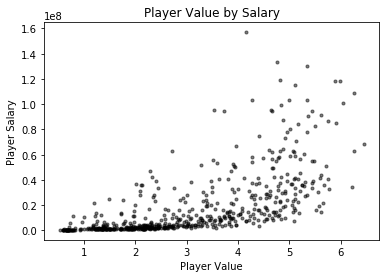

In [445]:
plt.title('Player Value by Salary')
N = 1500
x = playerTtl['OPS']
y = playerTtl['salary']
area = np.pi*3
colors = (0,0,0)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.xlabel('Player Value')
plt.ylabel('Player Salary')
plt.show()

In [459]:
from IPython.display import IFrame
powerBiEmbed = 'https://app.powerbi.com/view?r=eyJrIjoiYWU5YWU4MTEtNmVlYi00Nzk0LWE0MjktMGE2NjdkYTk4ZWRkIiwidCI6ImI4ZDkxNWRjLTBlZDgtNGMwYy1iNmYzLTdmMWZhNTc3MzQ5NyIsImMiOjN9'
IFrame(powerBiEmbed, width=950, height=800)